# Using Neural Network

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_excel('/content/drive/Data/Data_ML.xlsx')
df.head()

,Identifier,Company Name,Business Description,TRBC Economic Sector Name
0,CMI.N,Cummins Inc,"Cummins Inc. designs, manufactures, distribute...",Consumer Cyclicals
1,RIO.L,Rio Tinto PLC,Rio Tinto plc is a mining and metals company. ...,Basic Materials
2,RIO.AX,Rio Tinto Ltd,Rio Tinto Limited (Rio Tinto) is a mining comp...,Basic Materials
3,RDSa.AS,Royal Dutch Shell PLC,The Royal Dutch Shell plc explores for crude o...,Energy
4,BLT.L,BHP Billiton PLC,BHP Billiton Plc is a global resources company...,Basic Materials


In [3]:
df.isnull().sum()

Identifier                    0
Company Name                  0
Business Description         14
TRBC Economic Sector Name     0
dtype: int64

In [4]:
df = df[pd.notnull(df['Business Description'])]
df.shape

(23022, 4)

In [5]:
df['Sector ID'] = df['TRBC Economic Sector Name'].factorize(sort=True)[0]
df.head()

,Identifier,Company Name,Business Description,TRBC Economic Sector Name,Sector ID
0,CMI.N,Cummins Inc,"Cummins Inc. designs, manufactures, distribute...",Consumer Cyclicals,1
1,RIO.L,Rio Tinto PLC,Rio Tinto plc is a mining and metals company. ...,Basic Materials,0
2,RIO.AX,Rio Tinto Ltd,Rio Tinto Limited (Rio Tinto) is a mining comp...,Basic Materials,0
3,RDSa.AS,Royal Dutch Shell PLC,The Royal Dutch Shell plc explores for crude o...,Energy,3
4,BLT.L,BHP Billiton PLC,BHP Billiton Plc is a global resources company...,Basic Materials,0


In [6]:
X = df['Business Description']
y = df['Sector ID']
X.shape, y.shape

((23022,), (23022,))

In [7]:
X.head()

0    Cummins Inc. designs, manufactures, distribute...
1    Rio Tinto plc is a mining and metals company. ...
2    Rio Tinto Limited (Rio Tinto) is a mining comp...
3    The Royal Dutch Shell plc explores for crude o...
4    BHP Billiton Plc is a global resources company...
Name: Business Description, dtype: object

In [8]:
y.head()

0    1
1    0
2    0
3    3
4    0
Name: Sector ID, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

splits = [X_train, X_test, y_train, y_test]
for _ in splits:
    print(_.shape)

(18417,)
(4605,)
(18417,)
(4605,)


In [10]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
w2i = tokenizer.word_index
len(w2i)

70673

In [11]:
i2w = dict((v,k) for (k,v) in w2i.items())

print(list(w2i)[:10])
print(list(i2w)[:10])

['and', 'the', 'of', 'in', 'company', 'is', 'a', 'as', 'products', 'its']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [12]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

len(X_train_sequences), len(X_test_sequences)

(18417, 4605)

In [13]:
np.array(X_train_sequences[0])

array([ 127,    6,    7,  364,    1, 1035,    3,  184,    9,    1, 6067,
          2,    5,   19,   22,   89,   27, 5631, 3377,    9,    1, 2586,
          1,    2, 5631, 3377,    9,    1,   13,  137,    1,  140, 3617,
          1, 2312, 1459, 1976,    1, 1746, 1038, 4439, 2741, 1038, 1038,
        676,    1, 1038, 4688,  586, 2099,    9,    1, 2560, 5084,    2,
       2586,   13,  235,    1,  140,    7,   81,    3, 2586,   85,   32,
       1038,  367, 2586,  962,    1, 1747,    9,   38,    8, 8754, 2586,
        962,    1, 1262,    2,   13,  235,    1,  140, 2409, 6067,  143,
        229,  963, 6067,    1,  143,    1,   71, 4934])

In [14]:
len(X_train_sequences[0]), len(X_train_sequences[1])

(96, 95)

In [15]:
X_train_matrix = tokenizer.sequences_to_matrix(X_train_sequences, mode='tfidf')
X_test_matrix = tokenizer.sequences_to_matrix(X_test_sequences, mode='tfidf')

X_train_matrix.shape, X_test_matrix.shape

((18417, 10000), (4605, 10000))

In [16]:
X_train_matrix[0]

array([0.        , 2.6216343 , 1.65938339, ..., 0.        , 0.        ,
       0.        ])

In [17]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical.shape, y_test_categorical.shape

((18417, 10), (4605, 10))

In [18]:
y_train_categorical[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
model = Sequential()
model.add(Dense(1024, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_matrix, y_train_categorical, batch_size=512, epochs=10, validation_split=0.2)

Train on 14733 samples, validate on 3684 samples
Epoch 1/10
14733/14733 [==============================] - 3s 186us/step - loss: 0.8963 - acc: 0.7189 - val_loss: 0.5969 - val_acc: 0.8203
Epoch 2/10
14733/14733 [==============================] - 2s 130us/step - loss: 0.2140 - acc: 0.9377 - val_loss: 0.6070 - val_acc: 0.8127
Epoch 3/10
14733/14733 [==============================] - 2s 131us/step - loss: 0.0884 - acc: 0.9804 - val_loss: 0.6603 - val_acc: 0.8149
Epoch 4/10
14733/14733 [==============================] - 2s 128us/step - loss: 0.0413 - acc: 0.9935 - val_loss: 0.7083 - val_acc: 0.8135
Epoch 5/10
14733/14733 [==============================] - 2s 130us/step - loss: 0.0241 - acc: 0.9977 - val_loss: 0.7499 - val_acc: 0.8122
Epoch 6/10
14733/14733 [==============================] - 2s 131us/step - loss: 0.0158 - acc: 0.9989 - val_loss: 0.7875 - val_acc: 0.8103
Epoch 7/10
14733/14733 [==============================] - 2s 129us/step - loss: 0.0113 - acc: 0.9996 - val_loss: 0.8157 - v

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

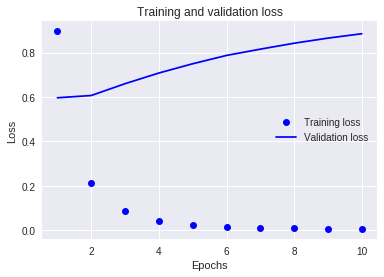

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

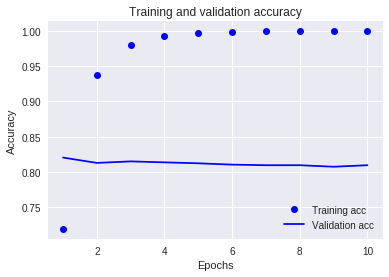

In [22]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()